# Data Analyst Associate Case Study Submission

## Company Background

PetMind is a nationwide pet product retailer in the United States. With inflation hitting 41-year
highs, the company is planning to reduce the cost of customer retention by improving brand
loyalty. The first strategy is to launch a monthly pet box subscription in three months.
The marketing team is preparing a list of popular products for the pet box subscription. The
chief marketing officer wants to know whether the list should only include the products being
purchased more than once.

## Data Validation
Before I procceded with my analysis, I ensured I perfomed thorough data validation and data wrangling to the dataset that was provided to me, my results are well explained below:

The original data consist of 879 rows and 9 columns, namely; 'product_id','product_category', 'sale', 'price', 'vendor_id', 'pet_size', 'pet_type', 'rating', 'rebuy'.
- I checked through the entire columns, 
- I observed no null values,neither were there any duplicated rows
- The 'sales' column was already converted into float type from the spreadsheet before importing into Datacamp's workspace, it was then converted to int type.
- The 'price' column was not altered.
- I removed rows that contained 'rabbit' and 'hamster' from the 'pet_type' column, in accordance to the data set description.A total of 46 rows were removed, leaving 833 rows.
- I replaced the values 1 and 0 with 'More than once' and 'Once' respectively in the 're-buy' column for better understanding.

These are the info  on the remianing column and rows;
- There are 11 unique product categories.
- Ratings ranged between 1 and 10, all being within the expected range.
- There are a total of 833 distinct vendors' id
- There are 11 unique product categories.
- There are 4 unique pet type.
- There are 5 unique pet size.
- the rebuy option contains 'More than once' and 'Once'.


In [21]:
#import the neccessary libaries needed, also import the csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('pet_sales (1).csv')

In [30]:
#Preview the first 5 rows
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,More than once
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,Once
3,4364,Snack,69000,241.27,VC_929,large,dog,1,More than once
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,Once
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,Once


In [31]:
#checked the information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        833 non-null    int64  
 1   product_category  833 non-null    object 
 2   sales             833 non-null    int64  
 3   price             833 non-null    float64
 4   vendor_id         833 non-null    object 
 5   pet_size          833 non-null    object 
 6   pet_type          833 non-null    object 
 7   rating            833 non-null    int64  
 8   re_buy            833 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 65.1+ KB


In [24]:
#check for total number of duplicated rows
df.duplicated().sum()

0

In [25]:
##Quick preview of the dataset
df.describe()

,product_id,sales,price,rating,re_buy
count,879.00000,879.000000,879.000000,879.000000,879.000000
mean,4611.00000,116094.425484,128.212253,6.500569,0.466439
std,253.88974,66297.297233,71.923583,2.852835,0.499156
min,4172.00000,3000.000000,0.350000,1.000000,0.000000
25%,4391.50000,60500.000000,65.210000,5.000000,0.000000
50%,4611.00000,116000.000000,129.520000,6.000000,0.000000
75%,4830.50000,177000.000000,188.220000,10.000000,1.000000
max,5050.00000,230000.000000,252.690000,10.000000,1.000000


In [26]:
#quick profiling of non numerical columns
df.describe(include='O')

,product_category,vendor_id,pet_size,pet_type
count,879,879,879,879
unique,11,879,5,6
top,Equipment,VC_1605,small,cat
freq,141,1,280,347


## Data Wrangling

In [27]:
# convert the 'sales' column into int type
df['sales']= df['sales'].astype(int)

In [28]:
# replace 1 and 0 with Yes and No respectively on the re-buy column
df['re_buy'].replace([1,0],['More than once','Once'], inplace=True)

In [29]:
#drop list of rows containg pet type that should be excluded in the 'pet_type' column
df.drop(df[np.logical_or(df.iloc[:,6]== 'rabbit', df.iloc[:,6]== 'hamster')].index, inplace= True)

## Customer's Questions
The marketing team would like to answer the following questions to help with the decision:
- How many products are being purchased more than once?
- Do the products being purchased again have better sales than others?
- What products are more likely to be purchased again for different types of pets?


## 1. How many products are being purchased more than once?

In [17]:
np.count_nonzero(df['re_buy']== 'More than once')

390

## observation:
There are 390 products which are being purchased more than once!

## 2. Do the products being purchased again have better sales than others?

In [18]:
#Group the 're_buy' column by sum of total sales using the 'sales' column
df.groupby('re_buy')['sales'].sum()

re_buy
More than once    45587000
Once              51125000
Name: sales, dtype: int64

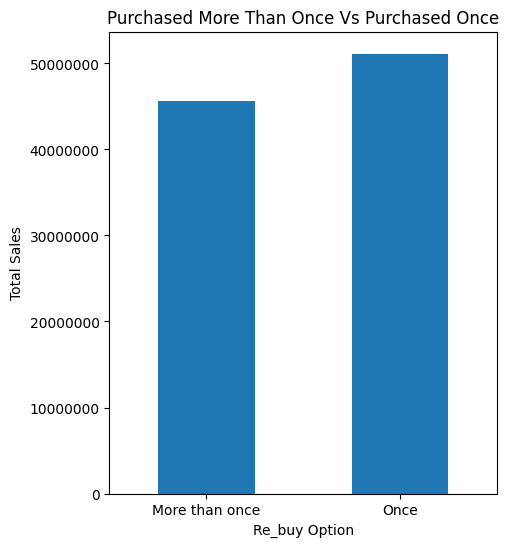

In [34]:
df.groupby('re_buy')['sales'].sum().plot(kind='bar', figsize=(5,6), ylabel='Total Sales',rot=0, xlabel='Re_buy Option', title='Purchased More Than Once Vs Purchased Once')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## observation:
Looking at the barchart above, we can see that products that were purchased once generated more revenue than products purchased more than once, over fifty million dollars ($50,000,000). The marketing team should these products in the pet box subscription.

## 3. What products are more likely to be purchased again for different types of pets?

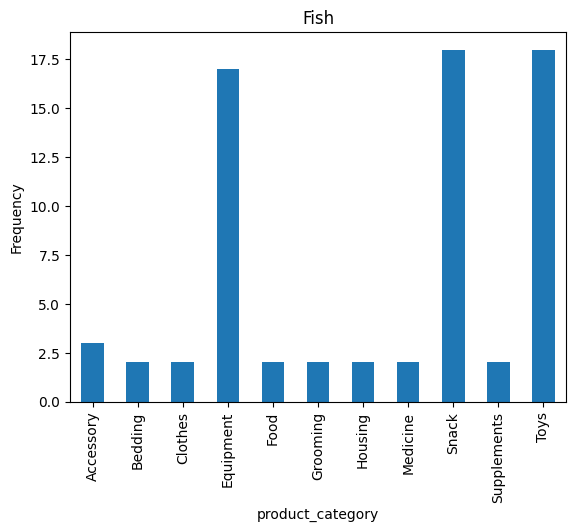

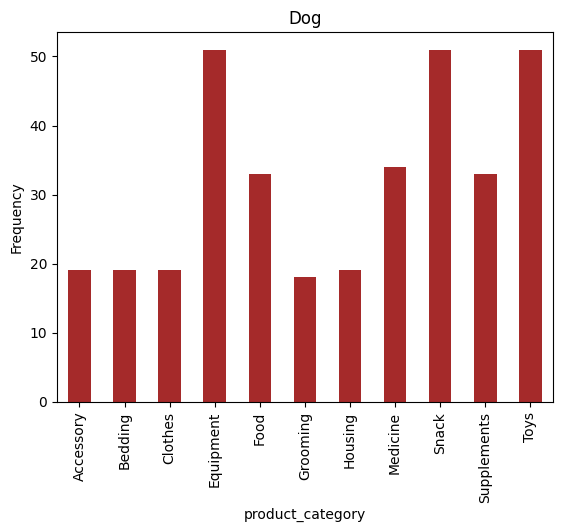

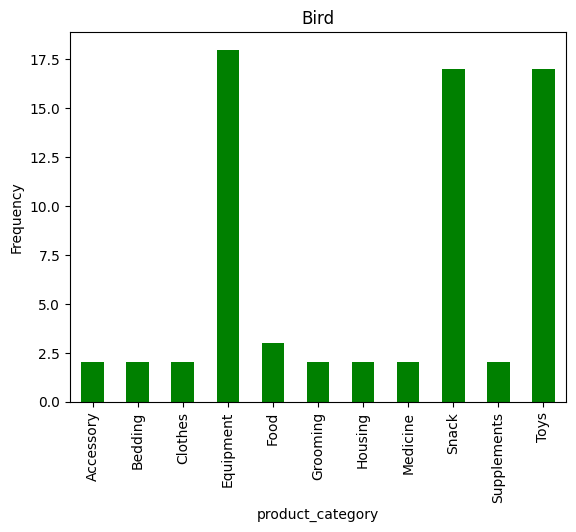

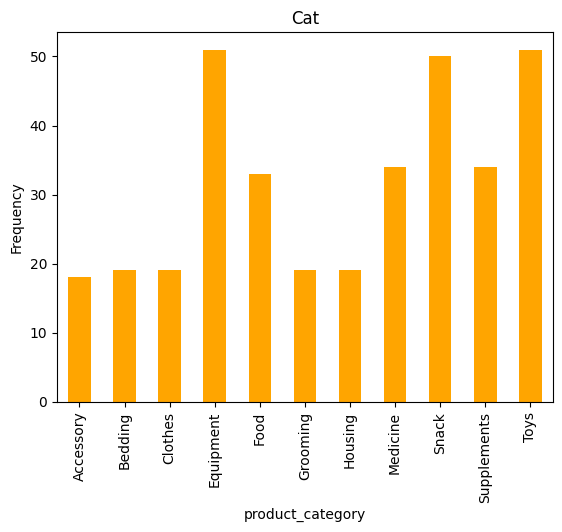

In [55]:
fish_df= df[df['pet_type']=='fish']
fish_df.groupby('product_category')['product_id'].count().plot(kind='bar', ylabel='Frequency', title='Fish')
plt.show()

dog_df= df[df['pet_type']=='dog']
dog_df.groupby('product_category')['product_id'].count().plot(kind='bar', ylabel='Frequency', title='Dog', color='Brown')
plt.show()

bird_df= df[df['pet_type']=='bird']
bird_df.groupby('product_category')['product_id'].count().plot(kind='bar', ylabel='Frequency', title='Bird', color='Green')
plt.show()

cat_df= df[df['pet_type']=='cat']
cat_df.groupby('product_category')['product_id'].count().plot(kind='bar', ylabel='Frequency', title='Cat', color='Orange')
plt.show()


## observation:
- Toys and Snack were the most purchased category of products for fishes
- Snack,Toys, and Equipment were the most purchased category of products for dogs
- Equipment was the most purchased category of products for birds
- Toys and Equipment were the most purchased category of products for cats

## Extra

## 4. How were PetMind's products rated?

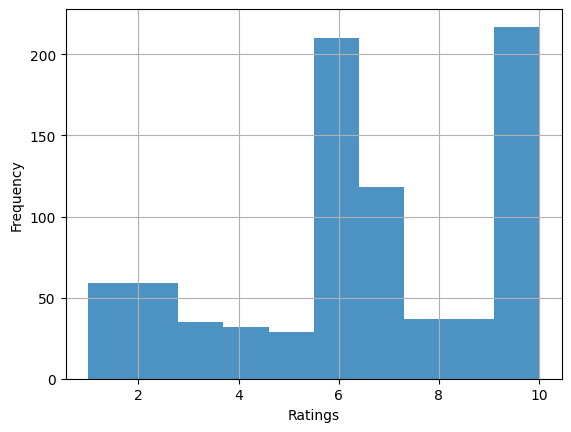

In [51]:
df['rating'].hist(alpha=0.8,bins=10)
plt.ylabel('Frequency')
plt.xlabel('Ratings')
plt.show()

## observation:
In general, the company's rating is great, as over 200 products were rated 10, this signifies the company produce good products and great services. Although certain products were rated as low as 1, such products should either be carefuly reviewed or discontinued. 

## 5. Check the correlation between sales and rating

In [58]:
import seaborn as sns

<AxesSubplot:>

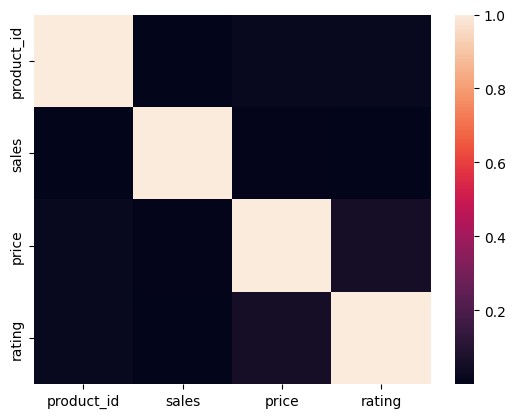

In [59]:
sns.heatmap(df.corr())

## Observation:
There isnt any correlation between sales and the ratings

# Summary
The innovation behind the Pet box subscription is a great one and is highhly commended, however, my recommendation to The chief marketing officer based on the question asked "whether the list should only include the products being purchased more than once.", are as follow:
-  Products that were purchased just once should be included in the pet box subscription as they generate more revenue in sales
- The company should also focus on priotizing top selling product categories across all pet type
- Lastly, products that were below the rating of 4 should be carefully reviewed or discontinued, so as to continue to improve customers services